#Data Preprocessing

In [1]:
# install kaggle
!pip install -q kaggle

In [2]:
# upload the generated api token in .json format from local system
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"urvikashyap","key":"ff1249274c273a5f60653b72fad85497"}'}

In [3]:
# make a kaggle directory in my files
!mkdir ~/.kaggle

In [4]:
# put the kaggle.json file in that directory
!cp kaggle.json ~/.kaggle/

In [5]:
# grant permission for the .json file to act
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
# list available datsets to ensure that the API worked and kaggle's linked
!kaggle datasets list

ref                                                                 title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                         📚 Students Performance Dataset 📚                     66KB  2024-06-12 23:09:20          17066        370  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024                   Most Streamed Spotify Songs 2024                    496KB  2024-06-15 18:50:51          12787        271  1.0              
priyamchoksi/spotify-dataset-114k-songs                             114000 Spotify Songs                                  8MB  2024-07-07 17:12:18            738         26  1.0              
ihelon/coffee-sales                     

In [7]:
# download the mri segmentation datset with its api command
!kaggle datasets download -d mateuszbuda/lgg-mri-segmentation

Dataset URL: https://www.kaggle.com/datasets/mateuszbuda/lgg-mri-segmentation
License(s): CC-BY-NC-SA-4.0
 99% 706M/714M [00:07<00:00, 166MB/s]
100% 714M/714M [00:07<00:00, 99.5MB/s]


In [8]:
# unzip the images from the .zip file so we can directly access these images
!unzip lgg-mri-segmentation.zip

Streaming output truncated to the last 5000 lines.
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7294_19890104/TCGA_DU_7294_19890104_9_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_1.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_10.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_10_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_11.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_11_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_12.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_12_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_13.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_1

In [ ]:
# unzip the images from the .zip file so we can directly access these images
!unzip lgg-mri-segmentation.zip

Streaming output truncated to the last 5000 lines.
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7294_19890104/TCGA_DU_7294_19890104_9_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_1.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_10.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_10_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_11.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_11_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_12.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_12_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_13.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_1

Data Preprocessing

In [21]:
#visualize the amount of tumours and non-tumours
import matplotlib.pyplot as plt
import numpy as np
import glob
import cv2
import pandas as pd

# path of all the images:
root_path = '/content/lgg-mri-segmentation/kaggle_3m/'

potential_mask_files = glob.glob(root_path + "*/*_mask*") # names of all the files with masks

mask_files = []
add_count = 0
for mask in potential_mask_files: # took most the files that have tumours in them to decrease the dataset since RAM keeps running out
  if np.max(cv2.imread(mask)) > 0:
    mask_files.append(mask)
  elif np.max(cv2.imread(mask)) == 0 and add_count % 3 == 0:
    mask_files.append(mask)

  add_count += 1

image_files = []
for mask in mask_files:
  rmask = mask.replace("_mask", "")
  image_files.append(rmask)

print(mask_files) # - e.x.: /content/lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_20040224/TCGA_FG_A60K_20040224_23_mask.tif
print(image_files) # - e.x.: /content/lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_20040224/TCGA_FG_A60K_20040224_23.tif

tumour_count = []

def diagnosis(mask_path):
    if np.max(cv2.imread(mask_path)) > 0: # return np.max(cv2.imread(mask_path)) - returns 255 if there is a tumour, otherwise returns 0
      tumour_count.append("1")
      return 1
    else:
      tumour_count.append("0")
      return 0

files_df = pd.DataFrame({"image_path": image_files,
                         "mask_path": mask_files,
                         "diagnosis": [diagnosis(x) for x in mask_files]})

print(files_df)

['/content/lgg-mri-segmentation/kaggle_3m/TCGA_FG_5962_20000626/TCGA_FG_5962_20000626_14_mask.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_FG_5962_20000626/TCGA_FG_5962_20000626_42_mask.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_FG_5962_20000626/TCGA_FG_5962_20000626_26_mask.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_FG_5962_20000626/TCGA_FG_5962_20000626_24_mask.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_FG_5962_20000626/TCGA_FG_5962_20000626_35_mask.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_FG_5962_20000626/TCGA_FG_5962_20000626_10_mask.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_FG_5962_20000626/TCGA_FG_5962_20000626_22_mask.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_FG_5962_20000626/TCGA_FG_5962_20000626_46_mask.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_FG_5962_20000626/TCGA_FG_5962_20000626_49_mask.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_FG_5962_20000626/TCGA_FG_5962_20000626_33_mask.tif', '/content

Tumours: 1373 ........... Non-Tumours: 827


<BarContainer object of 2 artists>

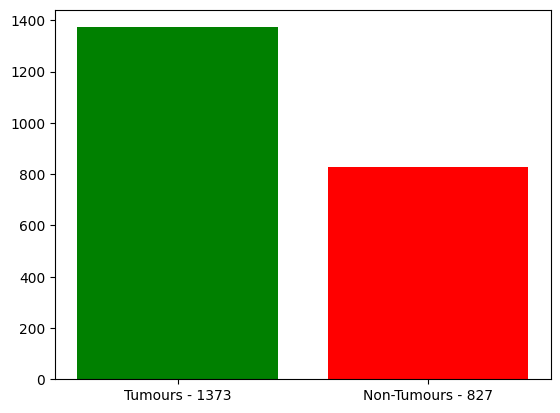

In [22]:
# to visualize the amount of tumours and non-tumours in the dataset
n_tumours = tumour_count.count("1")
n_nontumours = tumour_count.count("0")

print("Tumours: " + str(n_tumours), "...........", "Non-Tumours: " + str(n_nontumours))

plt.bar(["Tumours - " + str(n_tumours), "Non-Tumours - " + str(n_nontumours)], [n_tumours, n_nontumours], color=["green", "red"])

In [23]:
# importing libraries
import torch
import torchvision
from torchvision.transforms import transforms

In [24]:
# finding mean and standard deviation for the dataset
num_pixels = len(image_files)*256*256 #total number of pixels in our dataset

total_sum = 0
for data in image_files:
  image = cv2.imread(data)
  image = torch.from_numpy(image)
  total_sum += image[0].sum() #sum of the current batch of images

mean = total_sum/num_pixels


# std calculated with formula
sum_squared_error = 0
for data in image_files:
  image = cv2.imread(data)
  image = torch.from_numpy(image)
  sum_squared_error += ((image[0] - mean)**2).sum() #adding up the difference between all the elements in the batch and the mean

std = torch.sqrt(sum_squared_error/num_pixels) # only one element tensors can be converted to Python scalars, so use torch.sqrt instead of math.sqrt

print("Mean:", mean)
print("Standard Deviation:", std)

Mean: tensor(0.0222)
Standard Deviation: tensor(1.1787)


In [25]:
image_data = []
mask_data = []

# files are file paths, dataset is empty list that you will append the images too
def loading_data(files, dataset, actions):
  for data in files:
    # reading the image/mask
    image = cv2.imread(data) #makes it a numpy array

    # resizing the image/mask
    image = cv2.resize(image, (96, 96))
    # before, I flattened it and it changed a lot because, after the transformations, the tensor changes its composition when rotating or flipping
    # so when setting it to 256x256 again after, there's a weird result

    # convert the PIL image into a PyTorch tensor, cast the int8 values to float32, normalize
    if actions == True: # images
      transform = torchvision.transforms.Compose([transforms.ToTensor(),
                                                  transforms.ConvertImageDtype(torch.float),
                                                  transforms.Normalize((mean, mean, mean), (std, std, std))])
      image = transform(image)

    elif actions == False: # masks
      transform = torchvision.transforms.Compose([transforms.ToTensor(), transforms.ConvertImageDtype(torch.float), transforms.Grayscale()])
      image = transform(image)

    # no blurs needed because the edges need to be clear and precise

    dataset.append(image)

In [26]:
loading_data(image_files, image_data, True)

In [27]:
loading_data(mask_files, mask_data, False)

In [28]:
# when you run it again and again, change in #s for training data because it adds on

print(len(image_data), len(mask_data))

# split dataset into training, validation, and testing
len_trdataset = int(np.floor(len(image_data) * 0.60))
len_vtdataset = (len(image_data)-len_trdataset)//2

trimage_data = image_data[:len_trdataset]
trmask_data = mask_data[:len_trdataset]

vimage_data = image_data[len_trdataset:(len_trdataset+len_vtdataset)]
vmask_data = mask_data[len_trdataset:(len_trdataset+len_vtdataset)]

testimage_data = image_data[(len_trdataset+len_vtdataset):]
testmask_data = mask_data[(len_trdataset+len_vtdataset):]

print(str(len(trimage_data)), "----", str(len(vimage_data)), "----", str(len(testimage_data)))

2200 2200
1320 ---- 440 ---- 440


In [29]:
# the normalize function usually goes after data augmentation, but since only the positions of the pixels are changing (when flipping/rotating), it's not a problem

def data_augmentation(dataset): # adding modifications of original images to the dataset
  count = 0
  for image in dataset:
    # since the image is in a tensor, you can use torchvision's transforms
    # list of data augmentation commands
    if count % 9 == 0:
      # 90 degree clockwise rotation
      transform0 = transforms.RandomRotation(degrees=[90,90])
      image = transform0(image)
      dataset.append(image)

    elif count % 9 == 1:
      # vertical flip
      transform1 = transforms.RandomVerticalFlip(p=1)
      image = transform1(image)
      dataset.append(image)

    elif count % 9 == 2:
      # horizontal flip
      transform2 = transforms.RandomHorizontalFlip(p=1)
      image = transform2(image)
      dataset.append(image)

    count += 1

In [30]:
print(len(trimage_data))
print(len(trmask_data))

# data augmentation
data_augmentation(trimage_data)
data_augmentation(trmask_data)

# print statements to ensure that data augmentation worked
print(len(trimage_data))
print(len(trmask_data))

1320
1320
1980
1980


In [31]:
from torchvision import utils

# instead of making a classs to retrieve the data, you can zip the images and the masks, make that a tuple, and use that data for the dataloader
training_data = list(zip(trimage_data, trmask_data))
validation_data = list(zip(vimage_data, vmask_data))
testing_data = list(zip(testimage_data, testmask_data))

trainloader = torch.utils.data.DataLoader(training_data, batch_size=64, shuffle=True)
validationloader = torch.utils.data.DataLoader(validation_data, batch_size=64, shuffle=True)
testingloader = torch.utils.data.DataLoader(testing_data, batch_size=64, shuffle=True)

TEST:
torch.Size([64, 96, 96, 3])
torch.Size([64, 96, 96])
Images:


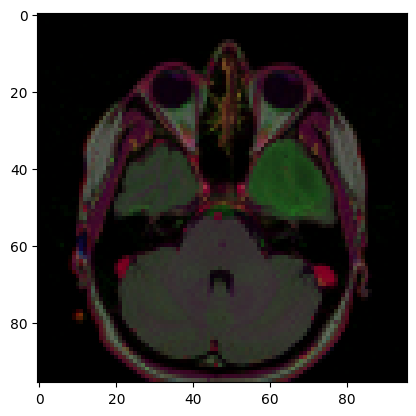

Masks:


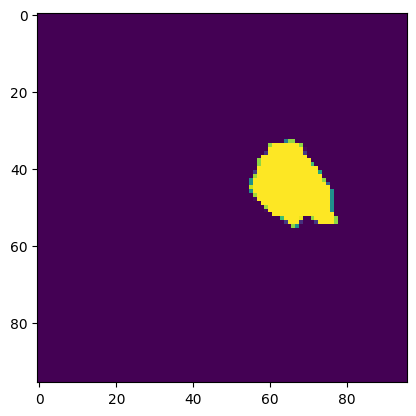



TRAIN:
torch.Size([64, 96, 96, 3])
torch.Size([64, 96, 96])
Images:


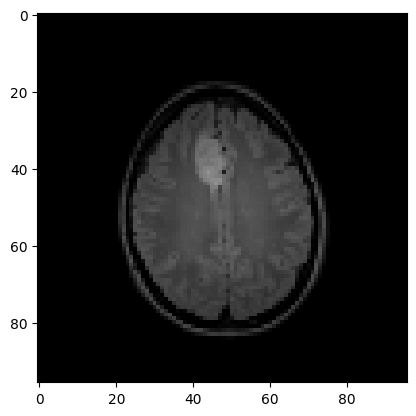

Masks:


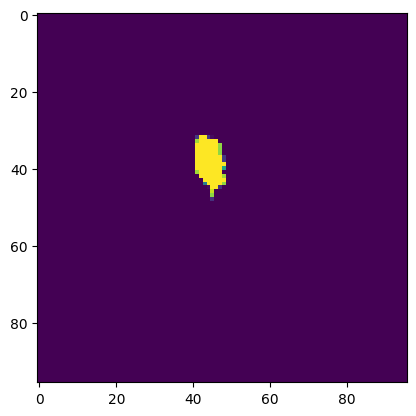



TEST:
torch.Size([64, 96, 96, 3])
torch.Size([64, 96, 96])
Images:


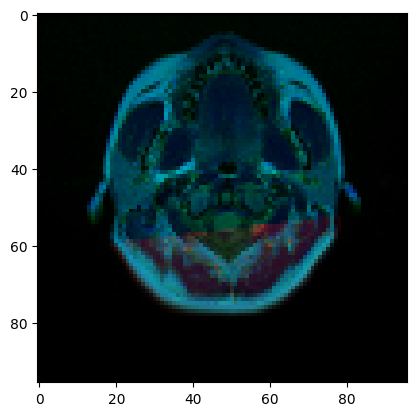

Masks:


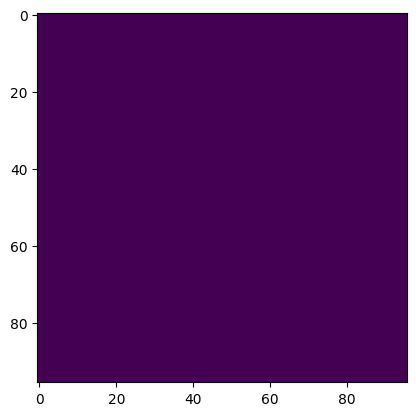

In [32]:
# testing data
trimages, trmasks = next(iter(trainloader))

trimages = trimages.permute((0,2,3,1))
trmasks = trmasks.permute((0,2,3,1))
trmasks = trmasks.squeeze()

print("TEST:")
print(trimages.shape)
print(trmasks.shape) # greyscaled

print("Images:")
plt.imshow(trimages[3])
plt.show()
print("Masks:")
plt.imshow(trmasks[3])
plt.show()

print("\n")

# validation data
vimages, vmasks = next(iter(validationloader))

vimages = vimages.permute((0,2,3,1))
vmasks = vmasks.permute((0,2,3,1))
vmasks = vmasks.squeeze()

print("TRAIN:")
print(vimages.shape)
print(vmasks.shape) # greyscaled

print("Images:")
plt.imshow(vimages[1])
plt.show()
print("Masks:")
plt.imshow(vmasks[1])
plt.show()

print("\n")

# testing data
testimages, testmasks = next(iter(testingloader))

testimages = testimages.permute((0,2,3,1))
testmasks = testmasks.permute((0,2,3,1))
testmasks = testmasks.squeeze()

print("TEST:")
print(testimages.shape)
print(testmasks.shape) # greyscaled

print("Images:")
plt.imshow(testimages[0])
plt.show()
print("Masks:")
plt.imshow(testmasks[0])
plt.show()

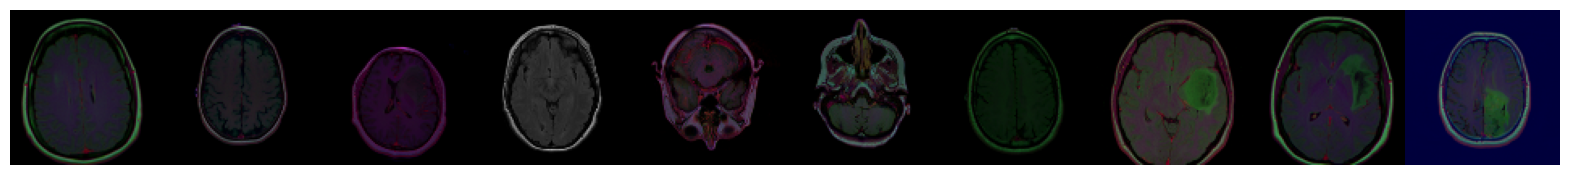

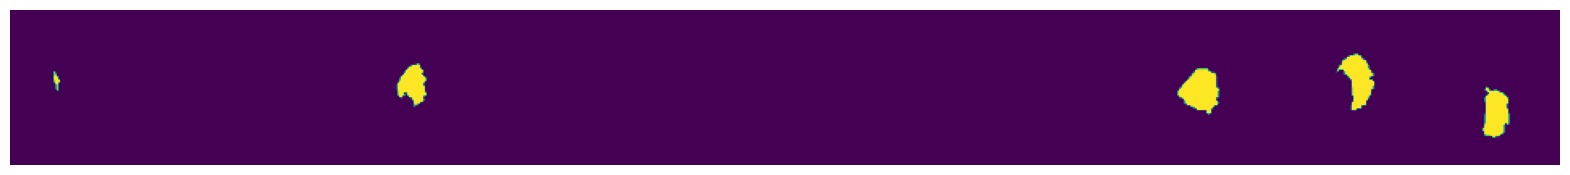

In [33]:
# visualize the images
def show_aug(loader, nrows=4, ncols=10):

    images, masks = next(iter(loader))
    images = images.permute((0,2,3,1))
    masks = masks.permute((0,2,3,1))
    masks = masks.squeeze()

    plt.figure(figsize=(20, 20))
    for i in range(len(images[:10])):
      plt.subplot(nrows, ncols, i+1)
      plt.imshow(images[i])
      plt.axis('off')
      plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

    plt.figure(figsize=(20, 20))
    for j in range(len(masks[:10])):
      plt.subplot(nrows, ncols, j+1)
      plt.imshow(masks[j])
      plt.axis('off')
      plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

show_aug(trainloader)

##K-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


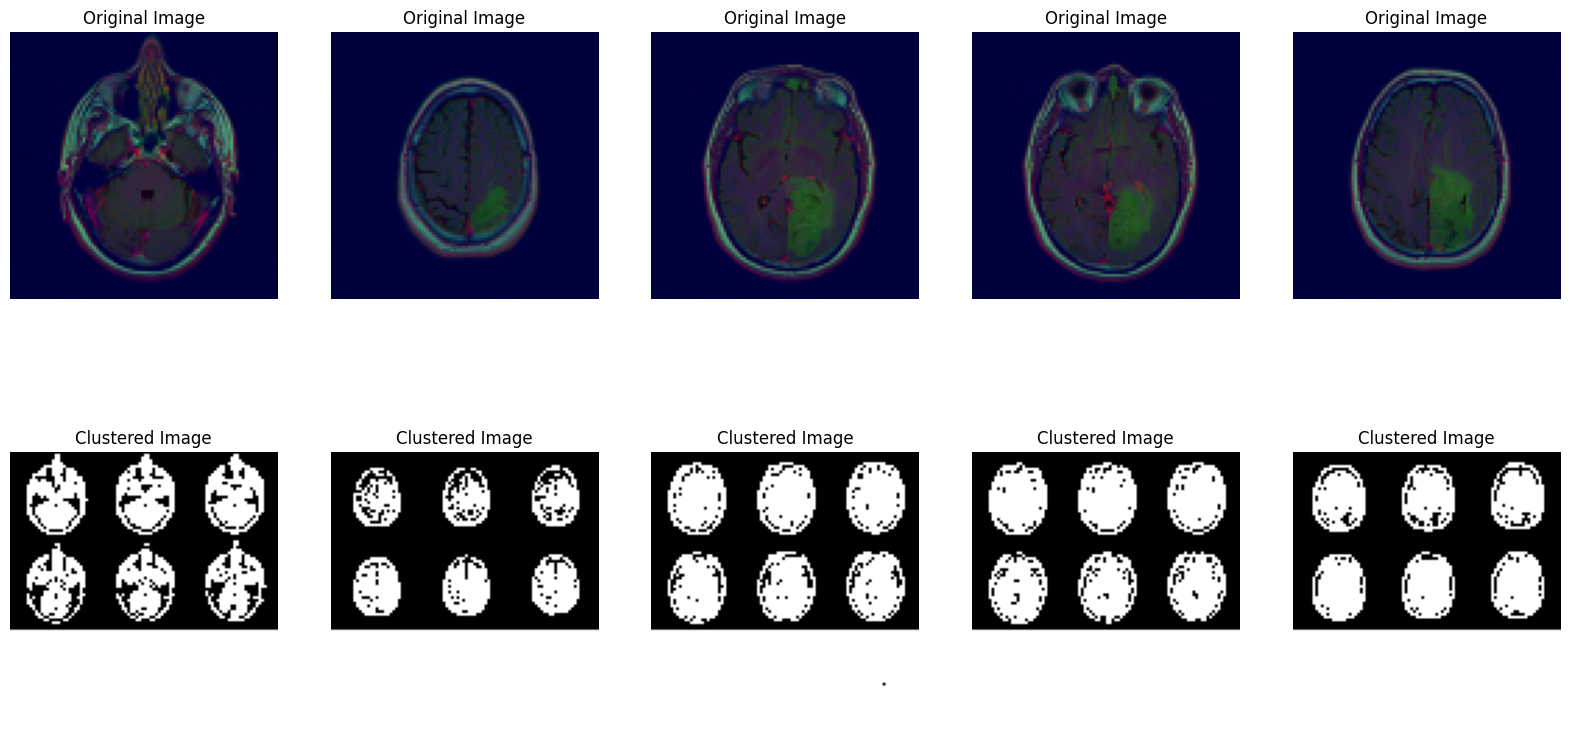

In [42]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Flatten the image data to apply k-means
flattened_images = []
for image in image_data:
    flattened_image = image.numpy().reshape(-1, 3)  # Reshape to (num_pixels, 3)
    flattened_images.append(flattened_image)

# Stack all images together for clustering
all_flattened_images = np.vstack(flattened_images)

# Apply k-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(all_flattened_images)
labels = kmeans.labels_

# Reshape the labels to match the original images
clustered_images = []
start = 0
for image in image_data:
    num_pixels = image.numel() // 3
    clustered_image = labels[start:start + num_pixels].reshape(96, 96)
    clustered_images.append(clustered_image)
    start += num_pixels

# Visualize some clustered images
n_samples = 5
plt.figure(figsize=(20, 10))
for i in range(n_samples):
    plt.subplot(2, n_samples, i+1)
    plt.imshow(np.transpose(image_data[i].numpy(), (1, 2, 0)))
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(2, n_samples, i+n_samples+1)
    plt.imshow(clustered_images[i], cmap='gray')
    plt.title("Clustered Image")
    plt.axis('off')

plt.show()


Accuracy: 0.7007957011521463
Precision: 0.017727272727272727
Recall: 1.0
F1 Score: 0.017727272727272727
IoU: 0.017727272727272727
Dice Coefficient: 0.01772727184090914


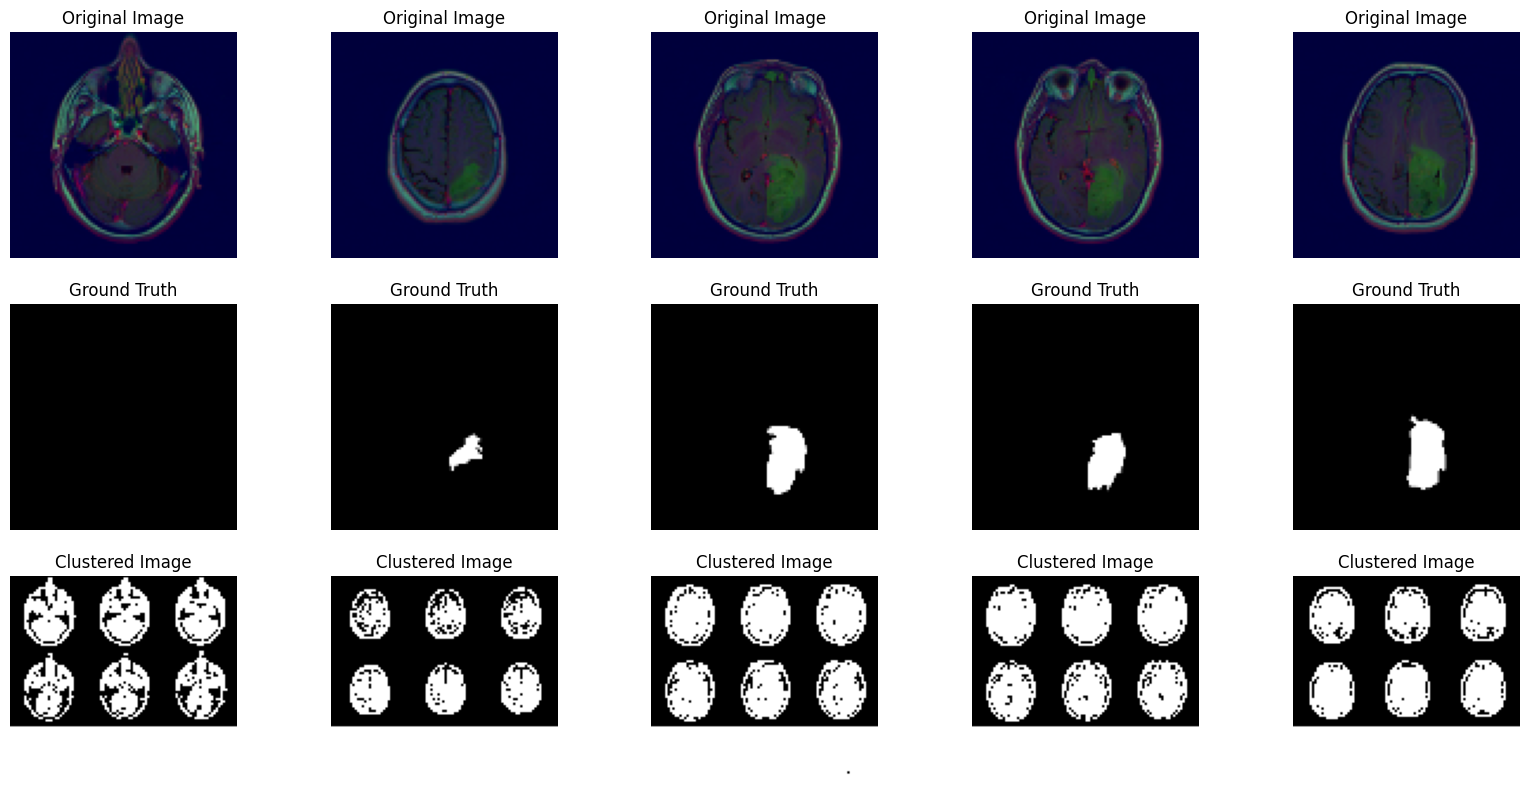

In [45]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, jaccard_score
import matplotlib.pyplot as plt

def calculate_metrics(y_true, y_pred):
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=1)
    recall = recall_score(y_true, y_pred, zero_division=1)
    f1 = f1_score(y_true, y_pred, zero_division=1)
    iou = jaccard_score(y_true, y_pred, zero_division=1)
    dice = 2 * (precision * recall) / (precision + recall + 1e-7)

    return accuracy, precision, recall, f1, iou, dice

# Ensure masks are binary
flattened_masks = [mask.numpy().astype(np.uint8).flatten() for mask in mask_data]

metrics = []
for i in range(len(clustered_images)):
    y_true = flattened_masks[i]
    y_pred = clustered_images[i].flatten()

    # Adjust threshold if necessary
    y_pred = (y_pred > 0.5).astype(np.uint8)

    metrics.append(calculate_metrics(y_true, y_pred))

# Calculate average metrics
metrics = np.array(metrics)
average_metrics = np.mean(metrics, axis=0)
metric_names = ["Accuracy", "Precision", "Recall", "F1 Score", "IoU", "Dice Coefficient"]
for name, value in zip(metric_names, average_metrics):
    print(f"{name}: {value}")

# Visualization
def visualize_results(original_images, clustered_images, masks, n_samples=5):
    plt.figure(figsize=(20, 10))
    for i in range(n_samples):
        plt.subplot(3, n_samples, i+1)
        plt.imshow(np.transpose(original_images[i].numpy(), (1, 2, 0)))
        plt.title("Original Image")
        plt.axis('off')

        plt.subplot(3, n_samples, i+n_samples+1)
        plt.imshow(masks[i].squeeze(), cmap='gray')
        plt.title("Ground Truth")
        plt.axis('off')

        plt.subplot(3, n_samples, i+2*n_samples+1)
        plt.imshow(clustered_images[i], cmap='gray')
        plt.title("Clustered Image")
        plt.axis('off')

    plt.show()

visualize_results(image_data, clustered_images, mask_data)


#Linknet


In [46]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.relu(self.bn2(self.conv2(out)))
        return out

class LinkNet(nn.Module):
    def __init__(self, num_classes=1):
        super(LinkNet, self).__init__()

        # Encoder
        self.encoder1 = BasicBlock(3, 64)
        self.encoder2 = BasicBlock(64, 128)
        self.encoder3 = BasicBlock(128, 256)
        self.encoder4 = BasicBlock(256, 512)

        # Decoder
        self.decoder4 = BasicBlock(512, 256)
        self.decoder3 = BasicBlock(256, 128)
        self.decoder2 = BasicBlock(128, 64)
        self.decoder1 = BasicBlock(64, 64)

        # Final layer
        self.final_conv = nn.Conv2d(64, num_classes, kernel_size=1)

    def forward(self, x):
        # Encoder
        e1 = self.encoder1(x)
        e2 = self.encoder2(F.max_pool2d(e1, 2))
        e3 = self.encoder3(F.max_pool2d(e2, 2))
        e4 = self.encoder4(F.max_pool2d(e3, 2))

        # Decoder
        d4 = F.interpolate(self.decoder4(e4), size=e3.size()[2:], mode='bilinear', align_corners=True) + e3
        d3 = F.interpolate(self.decoder3(d4), size=e2.size()[2:], mode='bilinear', align_corners=True) + e2
        d2 = F.interpolate(self.decoder2(d3), size=e1.size()[2:], mode='bilinear', align_corners=True) + e1
        d1 = F.interpolate(self.decoder1(d2), size=x.size()[2:], mode='bilinear', align_corners=True)

        out = self.final_conv(d1)
        return out

model = LinkNet(num_classes=1)


In [50]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, jaccard_score
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define the LinkNet Model
class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.relu(self.bn2(self.conv2(out)))
        return out

class LinkNet(nn.Module):
    def __init__(self, num_classes=1):
        super(LinkNet, self).__init__()

        # Encoder
        self.encoder1 = BasicBlock(3, 64)
        self.encoder2 = BasicBlock(64, 128)
        self.encoder3 = BasicBlock(128, 256)
        self.encoder4 = BasicBlock(256, 512)

        # Decoder
        self.decoder4 = BasicBlock(512, 256)
        self.decoder3 = BasicBlock(256, 128)
        self.decoder2 = BasicBlock(128, 64)
        self.decoder1 = BasicBlock(64, 64)

        # Final layer
        self.final_conv = nn.Conv2d(64, num_classes, kernel_size=1)

    def forward(self, x):
        # Encoder
        e1 = self.encoder1(x)
        e2 = self.encoder2(F.max_pool2d(e1, 2))
        e3 = self.encoder3(F.max_pool2d(e2, 2))
        e4 = self.encoder4(F.max_pool2d(e3, 2))

        # Decoder
        d4 = F.interpolate(self.decoder4(e4), size=e3.size()[2:], mode='bilinear', align_corners=True) + e3
        d3 = F.interpolate(self.decoder3(d4), size=e2.size()[2:], mode='bilinear', align_corners=True) + e2
        d2 = F.interpolate(self.decoder2(d3), size=e1.size()[2:], mode='bilinear', align_corners=True) + e1
        d1 = F.interpolate(self.decoder1(d2), size=x.size()[2:], mode='bilinear', align_corners=True)

        out = self.final_conv(d1)
        return out

# Create DataLoader
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, image_data, mask_data):
        self.images = image_data
        self.masks = mask_data

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        return self.images[idx], self.masks[idx]

# Convert to Tensors and create DataLoader
images = torch.stack([torch.Tensor(img) for img in image_data])
masks = torch.stack([torch.Tensor(mask) for mask in mask_data])
dataset = CustomDataset(images, masks)
train_loader = DataLoader(dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(dataset, batch_size=4, shuffle=False)

# Initialize model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LinkNet(num_classes=1).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 25
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for imgs, masks in train_loader:
        imgs, masks = imgs.to(device), masks.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(train_loader)}")


Epoch 1/25, Loss: 0.09708913211795417
Epoch 2/25, Loss: 0.032885733256963166
Epoch 3/25, Loss: 0.02647283301858062
Epoch 4/25, Loss: 0.022908500340047547
Epoch 5/25, Loss: 0.019749771145130084
Epoch 6/25, Loss: 0.016886030448579482
Epoch 7/25, Loss: 0.014324137067147108
Epoch 8/25, Loss: 0.013682796872877092
Epoch 9/25, Loss: 0.013577372270519845
Epoch 10/25, Loss: 0.011343517298704352
Epoch 11/25, Loss: 0.011167578061100688
Epoch 12/25, Loss: 0.010753061467416542
Epoch 13/25, Loss: 0.011282864044677064
Epoch 14/25, Loss: 0.009787481694398924
Epoch 15/25, Loss: 0.009849220022892537
Epoch 16/25, Loss: 0.010342913867544584
Epoch 17/25, Loss: 0.009089507816937509
Epoch 18/25, Loss: 0.008534689549791934
Epoch 19/25, Loss: 0.008616298904909689
Epoch 20/25, Loss: 0.00893858492162756
Epoch 21/25, Loss: 0.008426342184421546
Epoch 22/25, Loss: 0.008336978057910033
Epoch 23/25, Loss: 0.007806253738432464
Epoch 24/25, Loss: 0.007580910432076383
Epoch 25/25, Loss: 0.008904143744396359


Accuracy: 0.9969614109848485, Precision: 0.9007565345835207, Recall: 0.9385065454730379, F1 Score: 0.9192441394063643, IoU: 0.8505567010309278, Dice Coefficient: 0.9192440894274297


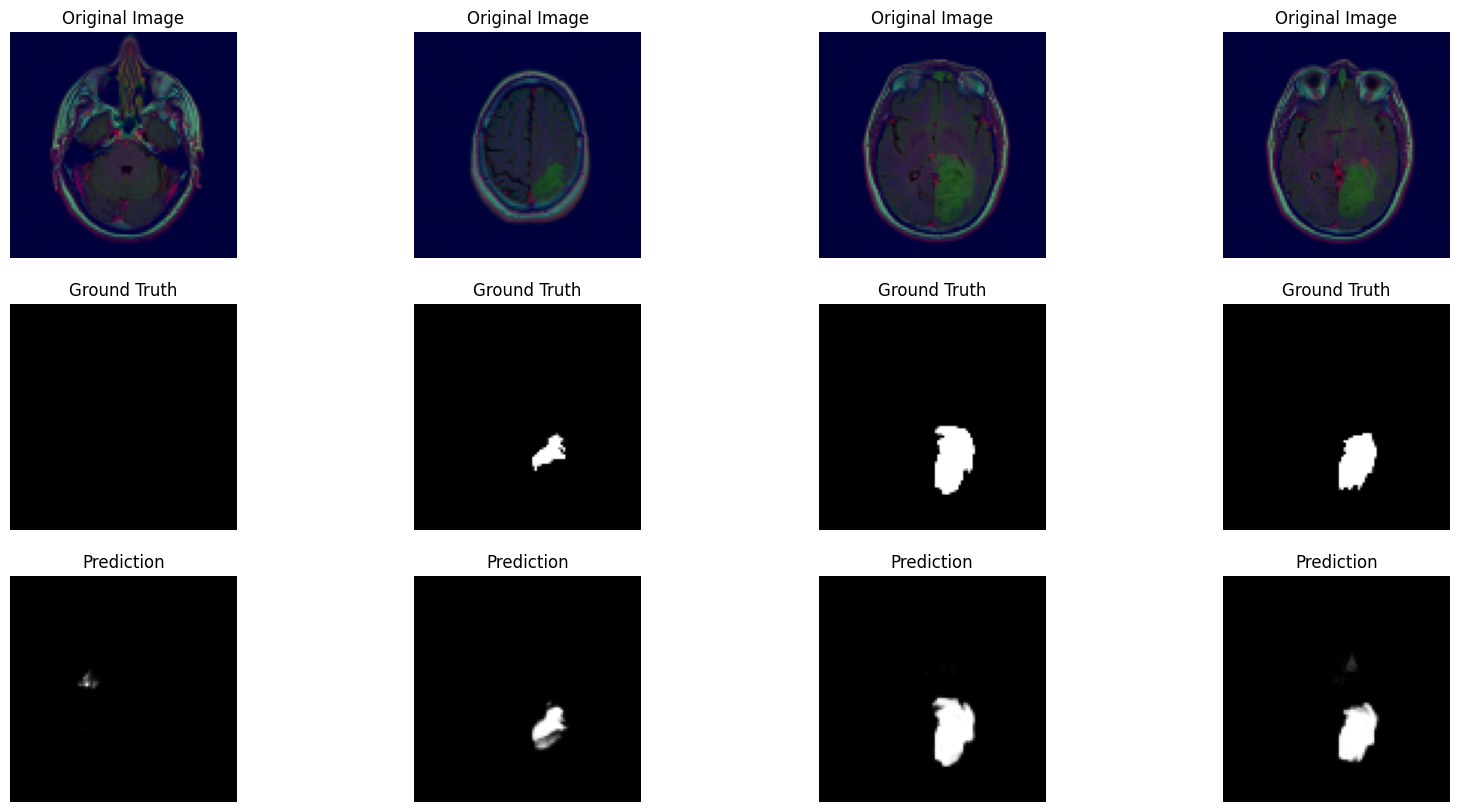

In [53]:
# Updated Evaluation Function
def calculate_metrics(y_true, y_pred):
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=1)
    recall = recall_score(y_true, y_pred, zero_division=1)
    f1 = f1_score(y_true, y_pred, zero_division=1)
    iou = jaccard_score(y_true, y_pred, zero_division=1)
    dice = 2 * (precision * recall) / (precision + recall + 1e-7)

    return accuracy, precision, recall, f1, iou, dice

def evaluate_model(model, test_loader):
    model.eval()
    all_labels = []
    all_preds = []
    with torch.no_grad():
        for images, masks in test_loader:
            images, masks = images.to(device), masks.to(device)
            outputs = model(images)
            preds = torch.sigmoid(outputs).cpu().numpy()

            # Binarize predictions with threshold of 0.5
            preds = (preds > 0.5).astype(np.uint8)
            masks = (masks.cpu().numpy() > 0.5).astype(np.uint8)  # Ensure ground truth is binary

            all_labels.append(masks)
            all_preds.append(preds)

    all_labels = np.concatenate(all_labels)
    all_preds = np.concatenate(all_preds)

    accuracy, precision, recall, f1, iou, dice = calculate_metrics(all_labels, all_preds)
    print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}, IoU: {iou}, Dice Coefficient: {dice}")

evaluate_model(model, val_loader)

# Visualization
def visualize_results(loader, model, n_samples=5):
    model.eval()
    images, masks = next(iter(loader))
    images, masks = images.to(device), masks.to(device)
    with torch.no_grad():
        outputs = model(images)
        preds = torch.sigmoid(outputs).cpu().numpy()

    images = images.cpu().numpy()
    masks = masks.cpu().numpy()

    # Ensure we don't exceed the batch size
    n_samples = min(n_samples, images.shape[0])

    plt.figure(figsize=(20, 10))
    for i in range(n_samples):
        plt.subplot(3, n_samples, i+1)
        plt.imshow(np.transpose(images[i], (1, 2, 0)))
        plt.title("Original Image")
        plt.axis('off')

        plt.subplot(3, n_samples, i+n_samples+1)
        plt.imshow(masks[i].squeeze(), cmap='gray')
        plt.title("Ground Truth")
        plt.axis('off')

        plt.subplot(3, n_samples, i+2*n_samples+1)
        plt.imshow(preds[i].squeeze(), cmap='gray')
        plt.title("Prediction")
        plt.axis('off')

    plt.show()

visualize_results(val_loader, model)
